## Classical Martingale

A Martingale is is a model for a fair game. It is given with respect to a filtration $F_n$ (typically represented by a Brownian motion) and a probability $p$. $X_m - X_n$ represents our (net?) winnings for our game, such that $E[X_m - X_n | F_n]$.

We define a "fair" game such that we have no winners or losers, so where $X_m - X_n$ represents our winnings for our game, $X_m - X_n = 0$

A sequence $Z_n$ is called a martingale with respect to a filtration $F_n$ if:
- (1) $E[|Z_n|] < \infty (\forall n)$
- (2) $Z_n \in F_n (\forall n)$
- (3) $E[Z_{n+1}|F_n] = Z_n(\forall n)$

- A **submartingale** is defined by $E[Z_{n+1}|F_n] \geq Z_n(\forall n)$
- A **supermartingale** is defined by $E[Z_{n+1}|F_n] \leq Z_n(\forall n)$.
- To make a random walk martingale, $S_0 = 0$, where $S_n = S_{n+1} + X_n$, where $S_n$ is the sum of $n$ (iid) random variables and $X_i$'s represent increments of the random walk.
Every martingale can be measured by the sum of its increments, so we can rewrite our
martingale as a sum of martingale differences such that $E[X_i|F_{i-1}] = 0$ and $Z_n = Z_0 + \Sigma^n_{i=1} X_i$.

## De Moivre's Martingale Simulation

Let $X_n$ be the result from $n$ tosses of a fair coin (so $p$ = 0.5)

Let $Y_n = X^{2}_n - n$ where $X_n$ is the preceding result. 
Then { $Y_n : n = 1, 2, 3,$ ..} is a martingale.

Let the coin be unfair, with probability of $p$ of one option (say heads) vs another (say tails) so that our second option $q$ is defined by $q = 1 - p$ of tails.
We let our options be represented as $+1$ for our first option (heads) and $-1$ for the other option (say tails).

The $Y_n$ definition doesn't hold for our condition so that is our TODO
This gives us $X_{n+1} = X_n \pm 1$ or 0, where $+$ represents heads and $-$ is tails or 0 if we hit the boundary.
We get that $Y_n = (\frac{q}{p})^{X_n}$ where {$Y_n$ : $n = 1,2,3,$..} is a martingale with respect to {$X_n$ : $n = 1,2,3,$ ..}.

Let's assume $q$ = 0.9
Then $p$ = 0.1

Another way of stating this: We get that $Z_n = (\frac{1-p}{p})^{X_n}$ where $Z$ = {$Z_n$ : $n \in N$} is a martingale with respect to $X$.

## What we want to do : todo add
We want to observe after N steps, our stopping time, the result of our random walk which has an equal likelihood of a toss of either -1 or 1 (i.e. p = 0.5 and q = 0.5).

## De Moivre's Martingale Code

In [169]:
## Import Libraries
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

In [170]:
p = 0.5
q = 1.0 - p
choice = [-1, 1]
x = random.choice(choice)
n = list(range(0, 20))
X_n = 0
random_toss_array = []
step_array = [0]
X_narray = [0]
moivrearray = [0]
for i in range(1, 20):
    num = random.choice(choice)
    step_array.append(i)
    X_n = X_n + num
    X_narray.append(X_n)
    random_toss_array.append(num)
    print("X_n {}, p {}, q {}".format(X_n, p, q))
    print(pow(q * 1.0 / p * 1.0, X_n))
    moivrearray.append((q * 1.0) / (p * 1.0))

print(random_toss_array) # this holds our tosses of -1 or 1
print(X_narray) # looks like things are cumulative in array1
print(moivrearray) ## Not quite there
print(step_array)


X_n 1, p 0.5, q 0.5
1.0
X_n 0, p 0.5, q 0.5
1.0
X_n 1, p 0.5, q 0.5
1.0
X_n 2, p 0.5, q 0.5
1.0
X_n 3, p 0.5, q 0.5
1.0
X_n 4, p 0.5, q 0.5
1.0
X_n 3, p 0.5, q 0.5
1.0
X_n 2, p 0.5, q 0.5
1.0
X_n 3, p 0.5, q 0.5
1.0
X_n 2, p 0.5, q 0.5
1.0
X_n 3, p 0.5, q 0.5
1.0
X_n 4, p 0.5, q 0.5
1.0
X_n 3, p 0.5, q 0.5
1.0
X_n 2, p 0.5, q 0.5
1.0
X_n 3, p 0.5, q 0.5
1.0
X_n 2, p 0.5, q 0.5
1.0
X_n 3, p 0.5, q 0.5
1.0
X_n 4, p 0.5, q 0.5
1.0
X_n 3, p 0.5, q 0.5
1.0
[1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1]
[0, 1, 0, 1, 2, 3, 4, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 4, 3]
[0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [123]:
# How far can I go? 
# Where does this come from and what does this get us?
# Does it fit what we need?
# What is our random variable sample space?
# Are we filtering out any values?
# What are our assumptions?

## Plot De Moivre's Martingale Simulation when p = 0.5

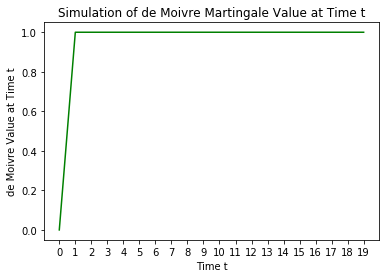

In [171]:
## plot p=0.5 simulation
plt.plot(step_array,moivrearray, color='green')
plt.xlabel('Time t') 
plt.ylabel('de Moivre Value at Time t') 
plt.title("Simulation of de Moivre Martingale Value at Time t")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.show()

## When probability is not equal i.e. p = 0.9

In [172]:
p = 0.9
q = 0.1
choice = [-1, 1, 0]
x = random.choice(choice)
n = list(range(0, 40))
X_n = 0
random_toss_array = []
X_narray = []
step_array = [0]
moivrearray = [0]
for i in range(1, 20):
    step_array.append(i)
    num = random.choice(choice)
    X_n = X_n + num
    X_narray.append(X_n)
    random_toss_array.append(num)
    print("X_n {}, p {}, q {}".format(X_n, p, q))
    print(pow(q * 1.0 / p * 1.0, X_n))
    moivrearray.append(pow(q * 1.0 / p * 1.0, X_n))
    

print(random_toss_array) # this holds our tosses of -1 or 1 or 0
print(X_narray) # X_n array should hold our accumulation +- our toss
print(moivrearray) ## calculate De Moivre result and add to array
print(step_array) ## what step are we?

## If our channel can only go to -3, then -4 would not be valid


X_n 0, p 0.9, q 0.1
1.0
X_n 0, p 0.9, q 0.1
1.0
X_n 0, p 0.9, q 0.1
1.0
X_n -1, p 0.9, q 0.1
9.0
X_n 0, p 0.9, q 0.1
1.0
X_n 1, p 0.9, q 0.1
0.11111111111111112
X_n 1, p 0.9, q 0.1
0.11111111111111112
X_n 0, p 0.9, q 0.1
1.0
X_n -1, p 0.9, q 0.1
9.0
X_n -1, p 0.9, q 0.1
9.0
X_n -2, p 0.9, q 0.1
80.99999999999999
X_n -3, p 0.9, q 0.1
728.9999999999999
X_n -2, p 0.9, q 0.1
80.99999999999999
X_n -3, p 0.9, q 0.1
728.9999999999999
X_n -3, p 0.9, q 0.1
728.9999999999999
X_n -3, p 0.9, q 0.1
728.9999999999999
X_n -4, p 0.9, q 0.1
6560.999999999998
X_n -5, p 0.9, q 0.1
59048.99999999998
X_n -5, p 0.9, q 0.1
59048.99999999998
[0, 0, 0, -1, 1, 1, 0, -1, -1, 0, -1, -1, 1, -1, 0, 0, -1, -1, 0]
[0, 0, 0, -1, 0, 1, 1, 0, -1, -1, -2, -3, -2, -3, -3, -3, -4, -5, -5]
[0, 1.0, 1.0, 1.0, 9.0, 1.0, 0.11111111111111112, 0.11111111111111112, 1.0, 9.0, 9.0, 80.99999999999999, 728.9999999999999, 80.99999999999999, 728.9999999999999, 728.9999999999999, 728.9999999999999, 6560.999999999998, 59048.99999999998, 

## Plot De Moivre's Martingale Simulation when p = 0.9

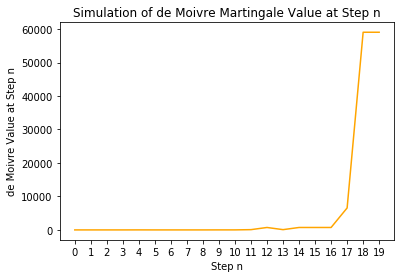

In [173]:
# plot p=0.9 simulation
import matplotlib.ticker as plticker


plt.plot(step_array, moivrearray, color='orange')
plt.xlabel('Step n') 
plt.ylabel('de Moivre Value at Step n') 
plt.title("Simulation of de Moivre Martingale Value at Step n")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.show()

#### References:
- [1] "Simulation and analysis of the carrying capacity for road networks using a grid-based approach" by J. Shi, L. Chen, F. Qiao, L. Yu, Q. Li, G. Fan.
- [2] "Modeling a Steady-State Lightning Network Economy" by G. Guidi
- [3] 
- [4] 
- [5]